# Analysis of Dynamic Systems

## Schedule:

- Getting started
- Introduction
- Mathematical bases
- Modeling with linear elements
- State variables
- Block diagrams
- Time response
- Frequency response
- Stability
- Root Locus
- Final project
- Course evaluation

## Mathematical bases

- Complex Variable Theory.
- Differential equations.
- Laplace transform.
- Theory of matrices.
- Bode diagrams.

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/dynamic-ud/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [3]:
# Run this only in Colab
# Rendering SymPy equations in Colab requires the MathJax javascript library
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

### Theory of matrices

The study of linear algebra involves working with various mathematical objects:
- **Scalars:** A scalar is a single number, in contrast to most other objects studied in linear algebra, which are usually a collection of multiple numbers.
- **Vectors:** A vector is a series of numbers. The numbers have a pre-set order, and we can identify each individual number by its index in that order. We can think of vectors as identifying points in space, with each element giving the coordinate along a different axis. There are two types of vectors, row vectors and column vectors. We can represent them as follows, where $f$ is a row vector and $c$ is a column vector:

$$f=\left[\begin{array}{ccc}
0 & -5 & 3\end{array}\right],\quad c=\left[\begin{array}{c}
0\\
-5\\
3
\end{array}\right]$$

- **Matrices:** A matrix is a two-dimensional arrangement of numbers (called matrix entries) arranged in rows (or lines) and columns, where a row is each of the horizontal lines of the matrix and a column is each of the vertical lines. In a matrix, each element can be identified using two indexes, one for the row and one for the column in which it is located. We can represent them in the following way, $A$ is a 3x2 matrix.

$$A=\left[\begin{array}{cc}
0 & -5\\
3.14 & 2\\
-1 & 5
\end{array}\right]$$

- **Tensors:** In some cases we will need a matrix with more than two axes. In general, a series of numbers arranged in a regular grid with a variable number of axes is known as a tensor.

On these objects we can perform basic mathematical operations, such as addition, multiplication, subtraction and division, that is, we will be able to add vectors with matrices, multiply scalars to vectors and so on.

The main Python module for matrix management is Numpy. This math package is very popular, and allows to create and manipulate vectors, matrices and tensors with great ease.

#### Vectors

A vector of length $n$ is a sequence (or array, or tuple) of $n$ numbers. We usually write it as $x=(x_1,...,x_n)$ or $x=[x_1,...,x_n]$.

In Python, a vector can be represented with a simple list, or as a Numpy array. It is better to use Numpy in order to facilitate number handling.

In [4]:
# Vector as a python list
v1 = [1, 2, 4, 6]

In [5]:
v1

[1, 2, 4, 6]

In [6]:
# Vector with Numpy
import numpy as np

v2 = np.ones(3) # Vector of only ones
v2

array([1., 1., 1.])

In [7]:
v3 = np.array([1, 2, 4, 60]) # Listing the numpy array
v3

array([ 1,  2,  4, 60])

In [13]:
v4 = np.arange(1, 10) # Using numpy's arange function
v4

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Traditionally, vectors are visually represented as arrows starting from the origin to a point. For example, if we wanted to graphically represent vectors $v_1=[2,5]$, $v_2=[-4,4]$ and $v_3=[-2.5,-4]$, we could do it as follows:

In [14]:
import matplotlib.pyplot as plt
from warnings import filterwarnings

%matplotlib inline
filterwarnings('ignore') # Ignore warnings

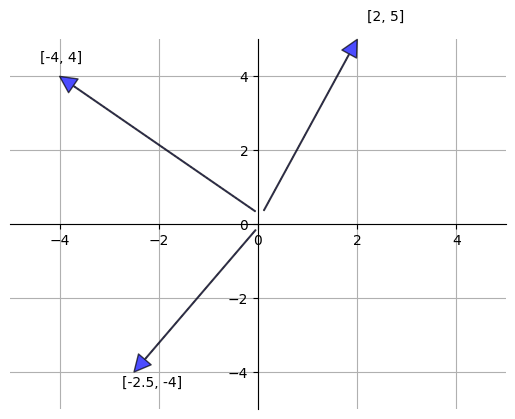

In [15]:
def move_spines():
    """It creates the pyplot figure and the axes.
    Move the lines from the left and from below so they
    intersect with the origin.
    Remove the lines on the right and the one above. Returns the axes."""
    fix, ax = plt.subplots()
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_position("zero")

    for spine in ["right", "top"]:
        ax.spines[spine].set_color("none")

    return ax

def vect_fig():
    """Generates the graphic of the vectors in the plane"""
    ax = move_spines()

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid()
    vecs = [[2, 5], [-4, 4], [-2.5, -4]] # Vector list
    for v in vecs:
        ax.annotate(" ", xy=v, xytext=[0, 0],
                   arrowprops=dict(facecolor="blue",
                                  shrink=0,
                                  alpha=0.7,
                                  width=0.5))
        ax.text(1.1 * v[0], 1.1 * v[1], v)

vect_fig() # crea el gráfico

#### Operations with vectors

The most common operations we use when working with vectors are addition, subtraction and multiplication by scalars.

When we add two vectors, we add element by element of each vector.

$$x+y=\left[\begin{array}{c}
x_{1}\\
x_{2}\\
\vdots\\
x_{n}
\end{array}\right]+\left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{array}\right]=\left[\begin{array}{c}
x_{1}+y_{1}\\
x_{2}+y_{2}\\
\vdots\\
x_{n}+y_{n}
\end{array}\right]$$

The subtraction operation works in a similar way.

$$x-y=\left[\begin{array}{c}
x_{1}\\
x_{2}\\
\vdots\\
x_{n}
\end{array}\right]-\left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{array}\right]=\left[\begin{array}{c}
x_{1}-y_{1}\\
x_{2}-y_{2}\\
\vdots\\
x_{n}-y_{n}
\end{array}\right]$$

Multiplication by scalars is an operation that takes a number $a$, and a vector $x$ y produces a new vector where each element of vector $x$ is multiplied by the number $a$.

$$a*x=a*\left[\begin{array}{c}
x_{1}\\
x_{2}\\
\vdots\\
x_{n}
\end{array}\right]=\left[\begin{array}{c}
ax_{1}\\
ax_{2}\\
\vdots\\
ax_{n}
\end{array}\right]$$

In Python we could perform these operations in the following way:

In [20]:
# We define two vectors
x = np.arange(1, 5)
y = np.array([2, 4, 6, 8])
x, y

(array([1, 2, 3, 4]), array([2, 4, 6, 8]))

In [22]:
# Adding two numpy vectors
x + y

array([ 3,  6,  9, 12])

In [23]:
z = x + y
z

array([ 3,  6,  9, 12])

In [24]:
# Subtracting two numpy vectors
x - y

array([-1, -2, -3, -4])

In [25]:
# Multiplying by a scalar
x * 3

array([ 3,  6,  9, 12])

In [26]:
y * 2

array([ 4,  8, 12, 16])

#### Scalar or interior product

The scalar product of two vectors is defined as the sum of the products of its elements, usually represented mathematically as $< x, y >$ or $x'y$, where $x$ and $y$ are two vectors.

$$<x,y>=\sum_{i=1}^{n}x_{i}y_{i}$$

Two vectors are orthogonal or perpendicular when they form a right angle to each other. If the scalar product of two vectors is zero, both vectors are orthogonal.

Additionally, every scalar product induces a norm about the space in which it is defined, as follows:

$$\left\Vert x\right\Vert =\sqrt{<x,x>}=\left(\sum_{i=1}^{n}x_{i}^{2}\right)^{\frac{1}{2}}$$

In Python we can calculate it in the following way:

In [27]:
# Calculating the scalar product of the x and y vectors
x @ y

60

In [28]:
# Or what is the same, that:
sum(x * y), np.dot(x, y)

(60, 60)

In [29]:
# Calculating the X-vector norm
np.linalg.norm(x)

5.477225575051661

In [30]:
# Another way to calculate the norm of x
np.sqrt(x @ x)

5.477225575051661

In [31]:
# Orthogonal vectors
v1 = np.array([3, 4])
v2 = np.array([4, -3])

v1 @ v2

0

#### Matrices

Matrices are a clear and simple way to organize data for use in linear operations.

An $n \times k$ matrix is a rectangular grouping of numbers with $n$ rows and $k$ columns. It is represented as follows

$$A=\left[\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1k}\\
a_{21} & a_{22} & \cdots & a_{2k}\\
\vdots & \vdots &  & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nk}
\end{array}\right]$$

In matrix $A$, the $a_{nk}$ symbol represents the $n$th element of the row in the $k$-column. Matrix $A$ can also be called a vector if either $n$ or $k$ equals 1. In the case of $n=1$, $A$ is called a row vector, while in the case of $k=1$ it is called a column vector.

Matrices are used for many applications and serve in particular to represent the coefficients of systems of linear equations or to represent linear transformations given a basis. They can be added, multiplied and decomposed in various ways.

#### Matrix operations

As with vectors, which are only one particular case, matrices can be added, subtracted and multiplied by scalars.

Multiplication by scalars:

$$b*A=b*\left[\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1k}\\
a_{21} & a_{22} & \cdots & a_{2k}\\
\vdots & \vdots &  & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nk}
\end{array}\right]=\left[\begin{array}{cccc}
ba_{11} & ba_{12} & \cdots & ba_{1k}\\
ba_{21} & ba_{22} & \cdots & ba_{2k}\\
\vdots & \vdots &  & \vdots\\
ba_{n1} & ba_{n2} & \cdots & ba_{nk}
\end{array}\right]$$

Addition of matrices:

$$A+B=\left[\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1k}\\
a_{21} & a_{22} & \cdots & a_{2k}\\
\vdots & \vdots &  & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nk}
\end{array}\right]+\left[\begin{array}{cccc}
b_{11} & b_{12} & \cdots & b_{1k}\\
b_{21} & b_{22} & \cdots & b_{2k}\\
\vdots & \vdots &  & \vdots\\
b_{n1} & b_{n2} & \cdots & b_{nk}
\end{array}\right]=\left[\begin{array}{cccc}
a_{11}+b_{11} & a_{12}+b_{12} & \cdots & a_{1k}+b_{1k}\\
a_{21}+b_{21} & a_{22}+b_{22} & \cdots & a_{2k}+b_{2k}\\
\vdots & \vdots &  & \vdots\\
a_{n1}+b_{n1} & a_{n2}+b_{n2} & \cdots & a_{nk}+b_{nk}
\end{array}\right]$$

Subtraction of matrices:

$$A-B=\left[\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1k}\\
a_{21} & a_{22} & \cdots & a_{2k}\\
\vdots & \vdots &  & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nk}
\end{array}\right]-\left[\begin{array}{cccc}
b_{11} & b_{12} & \cdots & b_{1k}\\
b_{21} & b_{22} & \cdots & b_{2k}\\
\vdots & \vdots &  & \vdots\\
b_{n1} & b_{n2} & \cdots & b_{nk}
\end{array}\right]=\left[\begin{array}{cccc}
a_{11}-b_{11} & a_{12}-b_{12} & \cdots & a_{1k}-b_{1k}\\
a_{21}-b_{21} & a_{22}-b_{22} & \cdots & a_{2k}-b_{2k}\\
\vdots & \vdots &  & \vdots\\
a_{n1}-b_{n1} & a_{n2}-b_{n2} & \cdots & a_{nk}-b_{nk}
\end{array}\right]$$

For the addition and subtraction cases, you have to take into account that you can only add or subtract matrices that have the same dimensions, that is, if you have a 3x2 dimension matrix $A$ (3 rows and 2 columns) you will only be able to add or subtract matrix $B$ if it also has 3 rows and 2 columns.

In Python:

In [32]:
A = np.array([[1, 3, 2],
              [1, 0, 0],
              [1, 2, 2]])

B = np.array([[1, 0, 5],
              [7, 5, 0],
              [2, 1, 1]])

In [33]:
A

array([[1, 3, 2],
       [1, 0, 0],
       [1, 2, 2]])

In [34]:
B

array([[1, 0, 5],
       [7, 5, 0],
       [2, 1, 1]])

In [35]:
# Addition of Matrixes A and B
A + B

array([[2, 3, 7],
       [8, 5, 0],
       [3, 3, 3]])

In [36]:
# Subtraction of Matrixes A and B
A - B

array([[ 0,  3, -3],
       [-6, -5,  0],
       [-1,  1,  1]])

In [37]:
# Multiplying matrices by scalars
A * 3

array([[3, 9, 6],
       [3, 0, 0],
       [3, 6, 6]])

In [38]:
B * 2

array([[ 2,  0, 10],
       [14, 10,  0],
       [ 4,  2,  2]])

In [39]:
# See the dimension of a matrix
A.shape

(3, 3)

In [40]:
# See the number of elements in a matrix
A.size

9

#### Multiplication or Matrix Product

The rule for matrix multiplication generalizes the idea of the inner product that we saw with the vectors, and is designed to facilitate basic linear operations. When we multiply matrices, the number of **columns** in the first matrix must equal the number of **rows** in the second matrix, and the result of this multiplication will have the same number of rows as the first matrix and the number of columns in the second matrix. That is, if I have a 3x4 dimension matrix $A$ and I multiply it by a 4x2 dimension matrix $B$, the result will be a 3x2 dimension matrix $C$.

Something to keep in mind when multiplying matrices is that the conmutative property is not fulfilled. $A \times B$ is not the same as $B \times A$.

Let's see examples in Python:

In [41]:
A = np.arange(1, 13).reshape(3, 4) # 3x4 dimension matrix
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [42]:
B = np.arange(8).reshape(4,2) # 4x2 dimension matrix
B

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [43]:
# Multiplying A x B
A @ B # It results in a 3x2 dimension matrix

array([[ 40,  50],
       [ 88, 114],
       [136, 178]])

In [44]:
# Multiplying B x A
B @ A

ValueError: ignored

#### The identity matrix, the reverse matrix, the transposed matrix and the determinant

The identity matrix is the neutral element in the multiplication of matrices, it is the equivalent of the number 1. Any matrix multiplied by the identity matrix results in the same matrix. The identity matrix is a square matrix (it always has the same number of rows as columns), and its main diagonal is composed of elements 1 and the rest of the elements are completed with 0. It is usually represented by the letter $I$.

For example the 3x3 identity matrix would be as follows:

$$I=\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{array}\right]$$

Now that we know the concept of the identity matrix, we can arrive at the concept of the reverse matrix. If we have a matrix $A$, the inverse matrix of $A$, which is represented as $A^{-1}$ is that square matrix that makes the multiplication $A \times A^{-1}$ equal to the identity matrix $I$. That is, it is the reciprocal matrix of $A$.

$$A\times A^{-1}=A^{-1}\times A=I$$

It should be noted that this inverse matrix may not exist in many cases. In this case the matrix is said to be singular or degenerated. A matrix is singular if and only if its determinant is null.

The determinant is a special number that can be calculated on the **square matrices**. It is calculated as the sum of the products of the diagonals of the matrix in one direction minus the sum of the products of the diagonals in the other direction. It is represented by the symbol |A|.

$$A=\left[\begin{array}{ccc}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{array}\right]$$

$$\left|A\right|=\left(a_{11}a_{22}a_{33}+a_{12}a_{23}a_{31}+a_{13}a_{21}+a_{32}\right)-\left(a_{31}a_{22}a_{13}+a_{32}a_{23}a_{11}+a_{33}a_{21}a_{12}\right)$$

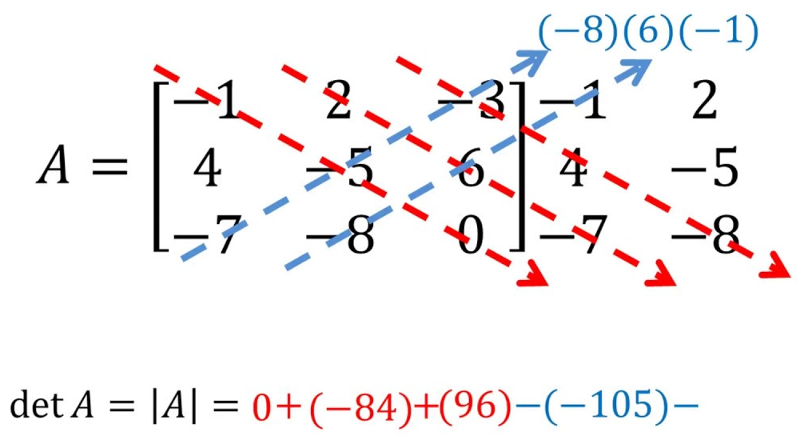

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'max1.png')

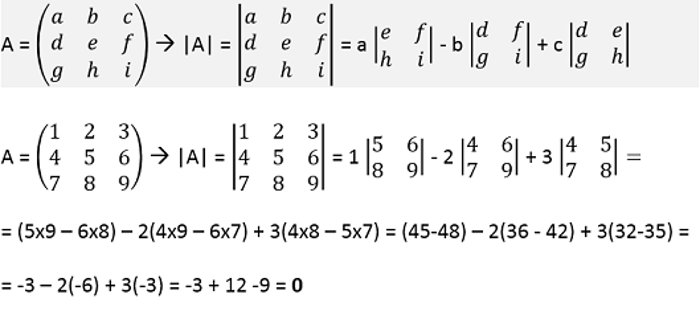

In [ ]:
Image(filename=valid_path + 'max2.png')

Finally, the transposed matrix is one in which rows are transformed into columns and columns into rows. It is represented by the symbol $A^T$.

$$\left[\begin{array}{cc}
a & b\\
c & d\\
e & f
\end{array}\right]^{T}=\left[\begin{array}{ccc}
a & c & e\\
b & d & f
\end{array}\right]$$

Let's see examples in Python:

In [ ]:
# Creating a 3x3 identity matrix
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# Multiplying a matrix by the identity gives us the same matrix
A = np.array([[4, 7, 2],
              [3, 1, 6],
              [2, 6, 1]])
A

array([[4, 7, 2],
       [3, 1, 6],
       [2, 6, 1]])

In [ ]:
A @ I # AxI = A

array([[4., 7., 2.],
       [3., 1., 6.],
       [2., 6., 1.]])

In [ ]:
# Calculating the determinant of matrix A
np.linalg.det(A)

-44.99999999999999

In [ ]:
# Calculating the inverse of A
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.77777778, -0.11111111, -0.88888889],
       [-0.2       , -0.        ,  0.4       ],
       [-0.35555556,  0.22222222,  0.37777778]])

In [ ]:
# A x A_inv results in I
A @ A_inv

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.22044605e-16,  1.00000000e+00,  0.00000000e+00],
       [ 1.11022302e-16,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
# Transposing a matrix
np.transpose(A)

array([[4, 3, 2],
       [7, 1, 6],
       [2, 6, 1]])

#### NumPy concatenate

NumPy’s concatenate function can be used to concatenate two arrays either row-wise or column-wise. Concatenate function can take two or more arrays of the same shape and by default it concatenates row-wise i.e. axis=0.

In [ ]:
A = np.arange(9).reshape(3, 3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
B = np.arange(9, 18).reshape(3, 3)
B

array([[ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [ ]:
# Concatenate 2 numpy arrays: row-wise
np.concatenate((A, B))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [ ]:
# Concatenate X numpy arrays: row-wise
np.concatenate((A, B, A, A))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8]])

In [ ]:
# Concatenate 2 numpy arrays: column-wise
np.concatenate((A,B),axis=1)

array([[ 0,  1,  2,  9, 10, 11],
       [ 3,  4,  5, 12, 13, 14],
       [ 6,  7,  8, 15, 16, 17]])

#### Systems of linear equations

One of the main applications of linear algebra is to solve problems of systems of linear equations.

A linear equation is an equation that involves only the addition and subtraction of one or more variables to the first power. When our problem is represented by more than one linear equation, we speak of a system of linear equations. For example, we could have a system of two equations with two unknowns like the following:

$$\left\{ \begin{array}{c}
x-2y=1\\
3x+2y=11
\end{array}\right.$$

The idea is to find the value of $x$ and $y$ that solves both equations. One way we can do this is by graphically representing both lines and looking for the points where the lines intersect.

(-0.25, 5.25, 0.0, 5.875)

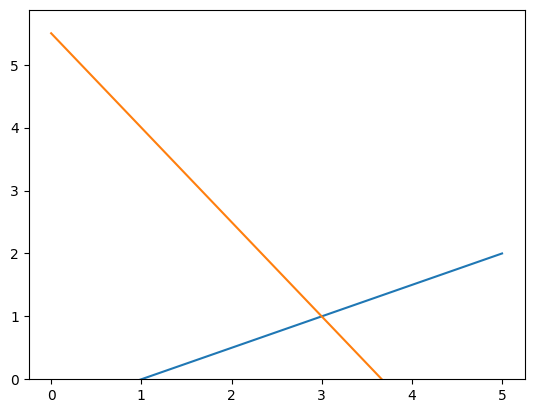

In [ ]:
x_vals = np.linspace(0, 5, 100) # Creates 100 values between 0 and 5
plt.plot(x_vals, (1 - x_vals)/-2) # x - 2y = 1
plt.plot(x_vals, (11 - (3*x_vals))/2) # 3x + 2y = 11
plt.axis(ymin = 0)

After graphing the functions, we can see that both lines intersect at point (3, 1), that is, the solution of our system would be $x=3$ and $y=1$. In this case, as it is a simple system with only two unknowns, the graphical solution can be useful, but for more complicated systems a numerical solution is needed, this is where the matrices come into play.

The same system could be represented as a matrix equation as follows:

$$\left[\begin{array}{cc}
1 & -2\\
3 & 2
\end{array}\right]\left[\begin{array}{c}
x\\
y
\end{array}\right]=\left[\begin{array}{c}
1\\
11
\end{array}\right]$$

Which is the same as saying that matrix $A$ multiplied by vector $x$ results in vector $b$.

$$Ax=b$$

In this case, we already know the result of $x$, so we can check that our solution is correct by performing matrix multiplication.

In [ ]:
# Checking the solution with matrix multiplication
A = np.array([[1., -2.],
              [3., 2.]])
x = np.array([[3.],[1.]])

A @ x

array([[ 1.],
       [11.]])

To solve the systems of equations in numerical form, there are several methods:
- Substitution method
- Equalization method
- Reduction method
- Graphical method
- Gaussian method
- Gauss-Jordan Elimination Method
- Cramer's Method

In Python, the $solve()$ function is used. For example, to solve this system of 3 equations and 3 unknowns:

$$\left\{ \begin{array}{c}
x+2y+3z=6\\
2x+5y+2z=4\\
6x-3y+z=2
\end{array}\right.$$

First we put together the matrix $A$ of coefficients and the matrix $b$ of results and then we use $solve()$ to solve it.

In [ ]:
# Creating matrix of coefficients
A = np.array([[1, 2, 3],
              [2, 5, 2],
              [6, -3, 1]])
A

array([[ 1,  2,  3],
       [ 2,  5,  2],
       [ 6, -3,  1]])

In [ ]:
# Creating results matrix
b = np.array([6, 4, 2])
b

array([6, 4, 2])

In [ ]:
# Solving the system of equations
x = np.linalg.solve(A, b)
x

array([-1.48029737e-16, -1.48029737e-16,  2.00000000e+00])

In [ ]:
# Checking the solution
A @ x == b

array([False,  True,  True])

In [ ]:
A @ x

array([6., 4., 2.])